In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [2]:
import matplotlib.pyplot as plt
from cerebra_atlas_python.cerebra import CerebrA
from cerebra_atlas_python.plotting import plot_volume_3d
cerebra = CerebrA()

In [3]:
import numpy as np
region_bias = np.array([1.5703534e-06, 2.0005900e-06, 1.3143535e-06, 1.5974761e-06,
       1.1252258e-06, 1.6764197e-06, 1.7851547e-06, 1.5025481e-06,
       2.0324189e-06, 2.0699590e-06, 1.1238728e-06, 1.7288635e-06,
       1.9974748e-06, 1.6790809e-06, 1.7119905e-06, 1.8315175e-06,
       2.0356192e-06, 1.1806879e-06, 1.6364706e-06, 1.6820881e-06,
       1.6832394e-06, 1.6531466e-06, 1.8713164e-06, 1.7730272e-06,
       1.4053709e-06, 1.7415919e-06, 1.4701612e-06, 1.5203078e-06,
       1.9416159e-06, 1.5808913e-06, 2.1687383e-06, 1.5748228e-06,
       1.9807819e-06, 1.3837108e-06, 1.5424718e-06, 1.1381718e-06,
       1.7184284e-06, 1.8504546e-06, 1.6069398e-06, 2.0340083e-06,
       1.9674508e-06, 1.1874574e-06, 1.5910779e-06, 1.9859024e-06,
       1.6082264e-06, 1.7800558e-06, 1.8663819e-06, 2.0220320e-06,
       1.0205334e-06, 1.6653055e-06, 1.7294146e-06, 1.7927805e-06,
       1.6424073e-06, 1.8332088e-06, 1.7308563e-06, 1.3682848e-06,
       1.7781285e-06, 1.3521690e-06, 1.4687944e-06, 1.9023008e-06,
       1.5543914e-06, 2.1917863e-06])
# Min max normalize
region_bias = (region_bias - region_bias.min()) / (region_bias.max() - region_bias.min())

In [11]:
region_alpha = region_bias -0.5
region_alpha[region_alpha<0] = 0

In [5]:
# turn to plt colors using cmap
import matplotlib.cm as cm
cmap = cm.get_cmap('turbo')
colors = cmap(region_bias)

/tmp/ipykernel_37287/4052951741.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('turbo')


In [8]:
from cerebra_atlas_python.plotting import get_cmap_colors_hex
cortical_colors = [get_cmap_colors_hex()[c_id] for c_id in cerebra.get_cortical_region_ids()]

/home/carlos/Carlos/cerebra_atlas_python/cerebra_atlas_python/cerebra.py:342: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mask = self.label_details["cortical"].fillna(False)


In [14]:
%matplotlib qt
cerebra.plot_3d(plot_regions=False,plot_highlighted_regions=cerebra.get_cortical_region_ids(),highlighted_regions_alphas=region_alpha,highlighted_region_colors=cortical_colors)

len(highlighted_regions_alphas)= 62 len(xs)= 340
len(highlighted_regions_alphas)= 62 len(xs)= 254
len(highlighted_regions_alphas)= 62 len(xs)= 79
len(highlighted_regions_alphas)= 62 len(xs)= 236
len(highlighted_regions_alphas)= 62 len(xs)= 60
len(highlighted_regions_alphas)= 62 len(xs)= 303
len(highlighted_regions_alphas)= 62 len(xs)= 410
len(highlighted_regions_alphas)= 62 len(xs)= 194
len(highlighted_regions_alphas)= 62 len(xs)= 285
len(highlighted_regions_alphas)= 62 len(xs)= 30
len(highlighted_regions_alphas)= 62 len(xs)= 139
len(highlighted_regions_alphas)= 62 len(xs)= 129
len(highlighted_regions_alphas)= 62 len(xs)= 43
len(highlighted_regions_alphas)= 62 len(xs)= 129
len(highlighted_regions_alphas)= 62 len(xs)= 149
len(highlighted_regions_alphas)= 62 len(xs)= 211
len(highlighted_regions_alphas)= 62 len(xs)= 443
len(highlighted_regions_alphas)= 62 len(xs)= 58
len(highlighted_regions_alphas)= 62 len(xs)= 294
len(highlighted_regions_alphas)= 62 len(xs)= 120
len(highlighted_regions_a

(<Figure size 640x480 with 1 Axes>,
 <Axes3D: xlabel='X (R)', ylabel='Y (A)', zlabel='Z (S)'>)

In [3]:
cerebra_vol = cerebra.cerebra_volume.copy()
cerebra.cerebra_volume[:127,:,:] = 0

(<Figure size 1500x1500 with 4 Axes>,
 array([[<Axes: xlabel='Y', ylabel='Z'>, <Axes: xlabel='X', ylabel='Z'>],
        [<Axes: xlabel='X', ylabel='Y'>, <Axes: >]], dtype=object))

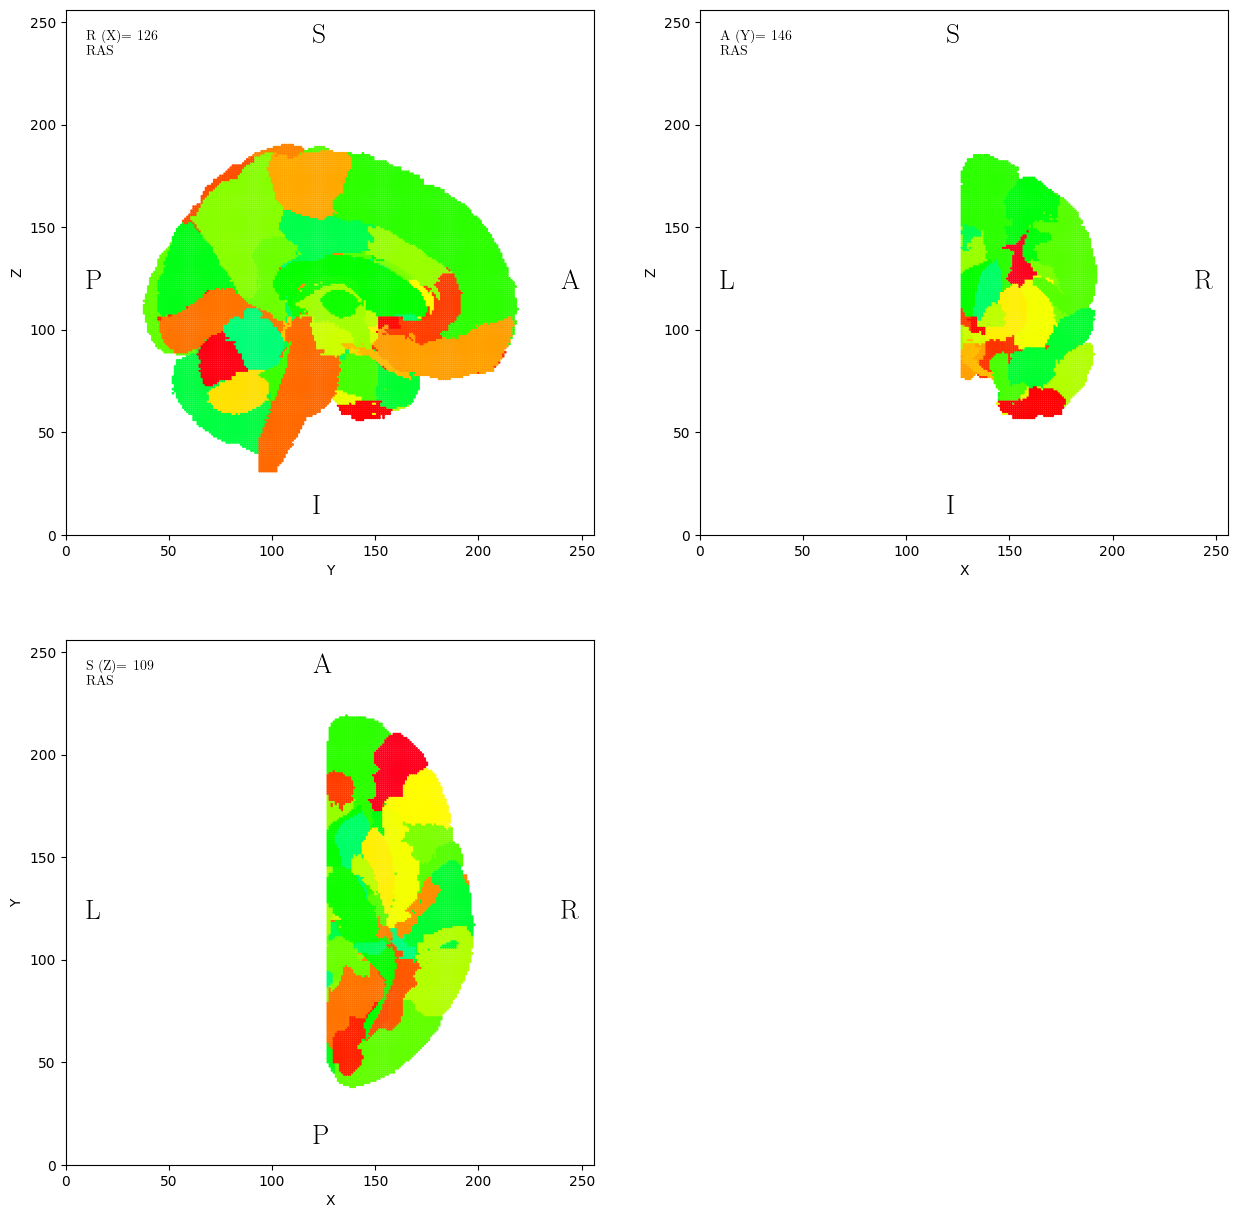

In [4]:
cerebra.orthoview()

In [5]:
region_ids = [10,11,12,13,14,15]
highlighted_regions = [cerebra.get_points_from_region_id(r_id) for r_id in region_ids]

In [16]:
cerebra.affine

array([[  1. ,   0. ,   0. , 126. ],
       [  0. ,   1. ,   0. , 146.5],
       [  0. ,   0. ,   1. , 109.5],
       [  0. ,   0. ,   0. ,   1. ]])

In [21]:
fig, ax = plot_volume_3d(cerebra.cerebra_volume, alpha=1,plot_whitematter=True,highlighted_regions=highlighted_regions) #
ax.view_init(elev=10., azim=155)

In [20]:
# Recommended (requires pyqt5)
%matplotlib qt 

In [8]:

cerebra.plot_3d(plot_bem=False,plot_src_space=False,density=4)

TypeError: plot_volume_3d() got an unexpected keyword argument 'region_pts'